### Plotting Confusion Matrix - 4 Class

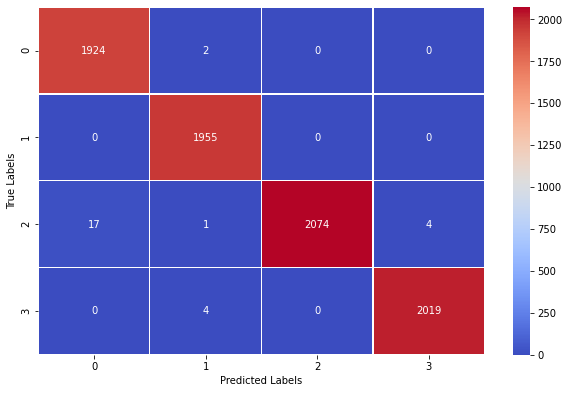

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline

f, ax = plt.subplots(figsize=(10, 6))

'''
conf_arr = [[156, 0, 0, 0, 0, 0, 1, 0, 0, 0],
            [0, 144, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 120, 0, 0, 1, 11, 0, 0, 4],
            [0, 0, 0, 153, 1, 0, 1, 0, 0, 0],
            [0, 0, 0, 0, 135, 0, 1, 0, 0, 0],
            [0, 0, 0, 2, 1, 149, 0, 0, 0, 0],
            [0, 0, 5, 0, 0, 0, 108, 3, 0, 37],
            [0, 0, 0, 0, 0, 0, 1, 159, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 167, 0],
            [0, 0, 1, 0, 0, 0, 32, 1, 0, 105]]
'''

#conf_arr = conf_matrix

conf_arr = [[1924, 2, 0, 0],
            [0, 1955, 0, 0],
            [17, 1, 2074, 4],
            [0, 4, 0, 2019]]

#corr = wines.corr()
hm = sns.heatmap(conf_arr, annot=True, ax=ax, cmap="coolwarm",fmt='.0f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
#plt.show()

plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

plt.savefig('galaxygrandprime-4-class-confusion_matrix.pdf', format='pdf', bbox_inches='tight')

### Plotting Confusion Matrix - 10 Class

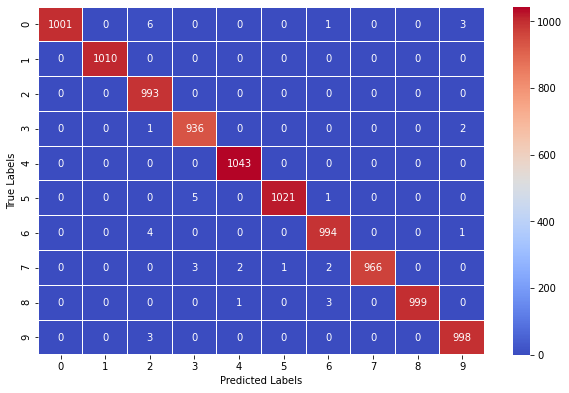

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline

f, ax = plt.subplots(figsize=(10, 6))

'''
conf_arr = [[156, 0, 0, 0, 0, 0, 1, 0, 0, 0],
            [0, 144, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 120, 0, 0, 1, 11, 0, 0, 4],
            [0, 0, 0, 153, 1, 0, 1, 0, 0, 0],
            [0, 0, 0, 0, 135, 0, 1, 0, 0, 0],
            [0, 0, 0, 2, 1, 149, 0, 0, 0, 0],
            [0, 0, 5, 0, 0, 0, 108, 3, 0, 37],
            [0, 0, 0, 0, 0, 0, 1, 159, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 167, 0],
            [0, 0, 1, 0, 0, 0, 32, 1, 0, 105]]
'''

#conf_arr = conf_matrix

conf_arr = [[1001, 0, 6, 0, 0, 0, 1, 0, 0, 3],
            [0, 1010, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 993, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 1, 936, 0, 0, 0, 0, 0, 2],
            [0, 0, 0, 0, 1043, 0, 0, 0, 0, 0],
            [0, 0, 0, 5, 0, 1021, 1, 0, 0, 0],
            [0, 0, 4, 0, 0, 0, 994, 0, 0, 1],
            [0, 0, 0, 3, 2, 1, 2, 966, 0, 0],
            [0, 0, 0, 0, 1, 0, 3, 0, 999, 0],
            [0, 0, 3, 0, 0, 0, 0, 0, 0, 998]]

#corr = wines.corr()
hm = sns.heatmap(conf_arr, annot=True, ax=ax, cmap="coolwarm",fmt='.0f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
#plt.show()

plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

plt.savefig('galaxygrandprime-10-class-confusion_matrix.pdf', format='pdf', bbox_inches='tight')

### FFT Windows

In [2]:
def getData(cfileName):
    """
    Given a name of a *.cfile, this function extracts the interleaved
    Inphase-Quadrature data samples and convert it into a numpy array of complex
    data elements. *.cfile format has interleaved I and Q samples where each sample
    is a float32 type. GNURadio Companion (GRC) scripts output data into a file
    though a file sink block in this format.
    Read more in SDR data types: https://github.com/miek/inspectrum
    """
    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")
    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

In [3]:
def getSegmentData(fileName, offsetTime, windowTime, fileType="cfile", sampleRate):
    '''
    Given a I-Q data file name, an offset value as a time, and an window time,
    this function extracts the required segment from the file and return it as
    a complx numpy array.    
    '''

    if (fileType=="cfile"):
        # dealing with a cfile file format
        data = getData(fileName)

    elif (fileType=="npy"):
        # dealing with a numpy file format
        data = np.load(fileName, mmap_mode='r')

    else:
        # unrecognized file type
        return -1

    # Segment starting offset (sample points)
    start = offsetTime * sampleRate    
    # Segment ending offset (sample points)
    end = start + (windowTime * sampleRate)
    #print("start=%d", int(start))
    #print("end=%d", int(end))
    #Return the starting index and ending index
    segment = data[int(start):int(end)]

    #return data
    return segment

SyntaxError: non-default argument follows default argument (<ipython-input-3-83a4279afd97>, line 1)

In [ ]:
#data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/apple-iphone-4s/calandar-app.cfile")

fig = plt.figure()
pxx, freq, t, cax = plt.specgram(data, NFFT=1024, Fs=20e6, mode='magnitude')
fig.colorbar(cax).set_label('Intensity [dB]')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()
del data

In [ ]:
#data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/apple-iphone-4s/calandar-app.cfile")

fig = plt.figure()
plt.psd(data, NFFT=2048, Fs=20e6)
#plt.xlabel("Time (s)")
#plt.ylabel("Frequency (Hz)")
plt.show()
del data

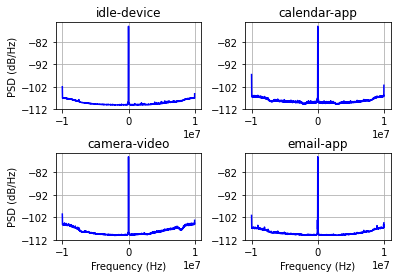

In [4]:
%matplotlib inline

#plt.figure(figsize=(10,5))
plt.figure()

plt.subplot(2,2,1)
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/galaxy-grand-prime/audio-recording.cfile")
plt.psd(data, NFFT=2048, Fs=20e6, color='b')
plt.ylabel('PSD (dB/Hz)')
plt.xlabel(' ')
plt.grid(True)
plt.title("idle-device")

plt.subplot(2,2,2)
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/galaxy-grand-prime/camera-video.cfile")
plt.psd(data, NFFT=2048, Fs=20e6, color='b')
plt.ylabel('')
plt.xlabel(' ')
plt.grid(True)
plt.title("calendar-app")

plt.subplot(2,2,3)
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/galaxy-grand-prime/idle.cfile")
plt.psd(data, NFFT=2048, Fs=20e6, color='b')
plt.ylabel('PSD (dB/Hz)')
plt.xlabel('Frequency (Hz)')
plt.grid(True)
plt.title("camera-video")

plt.subplot(2,2,4)
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/galaxy-grand-prime/web-browser-app.cfile")
plt.psd(data, NFFT=2048, Fs=20e6, color='b')
plt.ylabel(' ')
plt.xlabel('Frequency (Hz)')
plt.grid(True)
plt.title("email-app")

plt.subplots_adjust(wspace=0.3, hspace=0.5)

#plt.show()
plt.savefig("galaxygrandprime-psd-plots.pdf", bbox_inches='tight')